# Shubham Kumar Chaturvedi(DeepLearning assigment no: 5)

Q1: What are the advantages of a CNN over a fully connected DNN for image classification?

ANS: Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples. Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close.

Q2: What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much
RAM will this network require when making a prediction for a single instance? What about when
training on a mini-batch of 50 images?

ANS:  if the feature maps are represented using 32-bit floats, then the convolutional layer's output will occupy 200 × 150 × 100 × 32 = 96 million bits (about 11.4 MB) of RAM.

Q3: If your GPU runs out of memory while training a CNN, what are five things you could try to
solve the problem?

ANS:  Reduce the mini-batch size. Reduce dimensionality using a larger stride in one or more layers. Remove one or more layers.

Q4: Why would you want to add a max pooling layer rather than a convolutional layer with the
same stride?

ANS: Max-pooling helps in extracting low-level features like edges, points, etc. While Avg-pooling goes for smooth features. If time constraint is not a problem, then one can skip the pooling layer and use a convolutional layer to do the same.

Q5: When would you want to add a local response normalization layer?

ANS: the reason for using LRN was to encourage lateral inhibition. It is a concept in Neurobiology that refers to the capacity of a neuron to reduce the activity of its neighbors.

Q6: Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main
innovations in GoogLeNet, ResNet, SENet, and Xception?

ANS: The main innovation introduced by AlexNet compared to the LeNet-5 was its sheer size. AlexNet main elements are the same: a sequence of convolutional and pooling layers followed by a couple of fully-connected layers.

it is much larger and deeper, and (2) it stacks convolutional layers directly on top of each other, instead of stacking a pooling layer on top of each convolutional layer.

Q7: What is a fully convolutional network? How can you convert a dense layer into a
convolutional layer?

ANS: Fully Convolutional Networks, or FCNs, are an architecture used mainly for semantic segmentation. They employ solely locally connected layers, such as convolution, pooling and upsampling. Avoiding the use of dense layers means less parameters (making the networks faster to train).

Q8: What is the main technical difficulty of semantic segmentation?

ANS: While having a semantic segmentation is certainly a big advantage when trying to get object instances, there are a couple of problems: neighboring pixels of the same class might belong to different object instances and regions which are not connected my belong to the same object instance.

Q9: 

11490434/11490434 [==============================] - 2s 0us/step
> 98.533


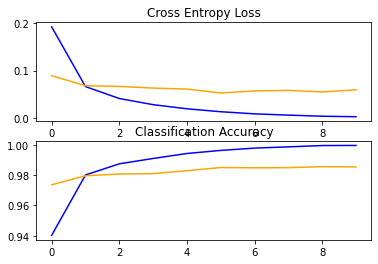

Accuracy: mean=98.533 std=0.000, n=1


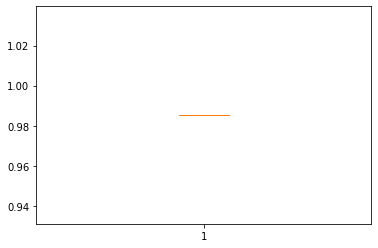

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm
 
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):

    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):

  for i in range(len(histories)):
  # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
 
# summarize model performance
def summarize_performance(scores):

  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()
  
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)
  # learning curves
  summarize_diagnostics(histories)
  # summarize estimated performance
  summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()